In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datei einlesen
eco = gpd.read_file("../../data/Rohdaten/messstandorte_verkehrszaehlungen_geojson/data/taz.view_eco_standorte.json")

# Grundstruktur prüfen
print("Datentypen:")
print(eco.dtypes)

print("\nNullwerte pro Spalte:")
print(eco.isnull().sum().sort_values(ascending=False))

print("\nForm:", eco.shape)

print("\nErste 5 Zeilen:")
print(eco.head())

print("\nEindeutige Werte pro Spalte:")
print(eco.nunique().sort_values(ascending=False))

print("\nDoppelte Zeilen:", eco.duplicated().sum())
print("Doppelte Geometrien:", eco.geometry.duplicated().sum())

print("\nSpalten mit nur einem Wert:")
print(eco.columns[eco.nunique() <= 1])


Datentypen:
abkuerzung           object
bezeichnung          object
bis                  object
fk_zaehler           object
id1                   int32
richtung_in          object
richtung_out         object
von                  object
objectid             object
korrekturfaktor     float64
geometry           geometry
dtype: object

Nullwerte pro Spalte:
bis                26
richtung_out        4
abkuerzung          0
bezeichnung         0
fk_zaehler          0
id1                 0
richtung_in         0
von                 0
objectid            0
korrekturfaktor     0
geometry            0
dtype: int64

Form: (171, 11)

Erste 5 Zeilen:
  abkuerzung              bezeichnung             bis   fk_zaehler  id1  \
0   VZS_BINZ         Binzmühlestrasse  20180404000000  ECO09113500    7   
1   VZS_BUCH             Bucheggplatz  20190313000000  ECO09113505   16   
2   VZS_KLOW         Kloster-Fahr-Weg  20200203000000  Y0412032046   53   
3   VZS_HOFW         Hofwiesenstrasse  20190313000000 

### 📝 Datenprüfung: Eco-Standorte Zürich (`taz.view_eco_standorte.json`)

Der Datensatz umfasst **171 Standorte**, die mit dem Label „Eco“ geführt werden – vermutlich Messpunkte, Anlagen oder zählbare Infrastrukturen im Zusammenhang mit Energie, Umwelt oder Verkehr. Jeder Eintrag ist mit einer Punkt-Geometrie versehen und umfasst 11 Attribute.

**Datenstruktur:**
- Die Daten enthalten verschiedene Bezeichnungen (`bezeichnung`), Kürzel (`abkuerzung`) und Zählerkennungen (`fk_zaehler`).
- Die Spalten `von` und `bis` repräsentieren vermutlich Zeitstempel im Format `yyyymmddHHMMSS`, z.B. zur Erfassung von Messzeiträumen.
- Die Spalte `korrekturfaktor` liegt als `float` vor und scheint auf eine Gewichtung oder Umrechnungsgröße hinzuweisen.

**Nullwerte:**
- Die Spalte `bis` ist bei **26 von 171 Einträgen leer**, möglicherweise weil die Messung noch aktiv ist.
- `richtung_out` fehlt in 4 Fällen, was auf ungerichtete Messstationen oder irrelevante Angaben hindeuten könnte.
- Alle anderen Felder sind vollständig gefüllt.

**Doppelte Einträge:**
- **Keine doppelten Zeilen** vorhanden.
- **90 doppelte Geometrien** → Das bedeutet, dass sich mehrere Einträge **denselben Standort teilen**, z.B. für unterschiedliche Zeiträume, Richtungen oder Zähler.

**Eindeutige Werte:**
- Die Spalten `id1` und `objectid` sind eindeutig → gut als Schlüssel verwendbar.
- Es gibt **110 eindeutige „von“-Werte** und **90 unterschiedliche „bis“-Werte**, was auf verschiedene Start- und Endzeitpunkte hindeutet.
- `korrekturfaktor` zeigt 42 verschiedene Werte und könnte für die spätere **gewichtete Analyse** genutzt werden.

**Fazit:**
Der Datensatz bietet eine strukturierte Übersicht über sogenannte **Eco-Standorte**, die sich z.B. als **Verkehrszählstellen, Umweltmesspunkte oder ökologisch relevante Infrastruktur** interpretieren lassen. Die Vielzahl doppelter Geometrien legt nahe, dass an einzelnen Standorten mehrere Zeitabschnitte oder Richtungsangaben erfasst wurden. Für räumliche Analysen ist der Datensatz direkt nutzbar, insbesondere zur **Verknüpfung mit Verkehrs-, Umwelt- oder Infrastrukturthemen**.


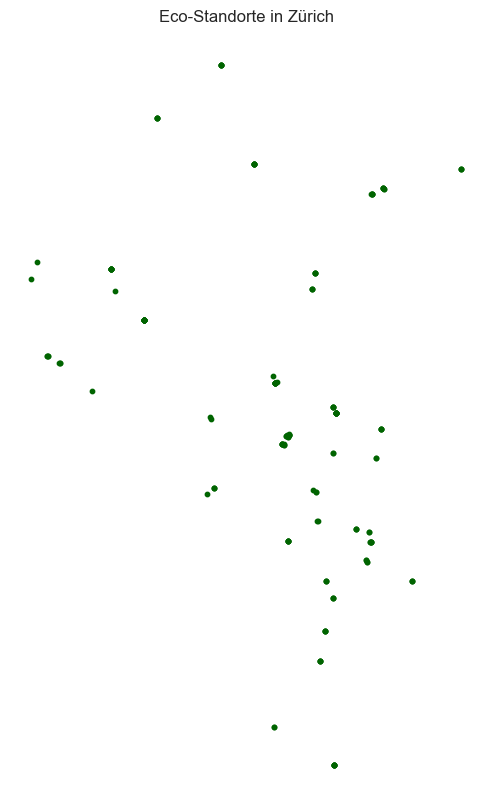

In [2]:
# Übersichtskarte mit Punkten
eco.plot(figsize=(10, 10), color="darkgreen", markersize=10)
plt.title("Eco-Standorte in Zürich")
plt.axis("off")
plt.show()
